In [1]:
import os, sys
sys.path.append('..')

import numpy as np
from src.solver import solver1D
from scipy.stats import norm

from src.model.carrier_density import *
import matplotlib.pyplot as plt
from scipy.constants import e, k, epsilon_0

# Si PN Junction (homojunction)

In [2]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-1e-4, 1e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [3]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)


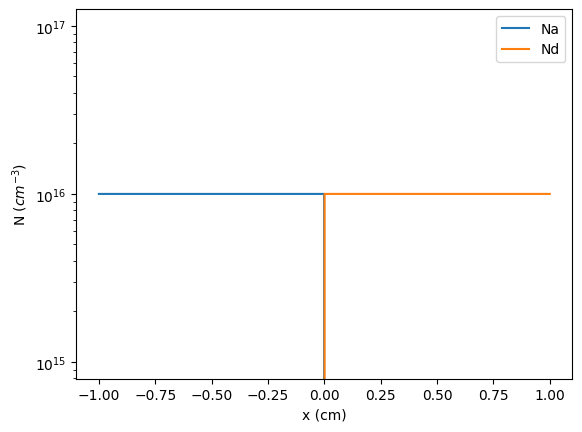

In [4]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [5]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V, V_history = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000, record=True)

 41%|████      | 818/2000 [00:02<00:03, 369.87it/s]


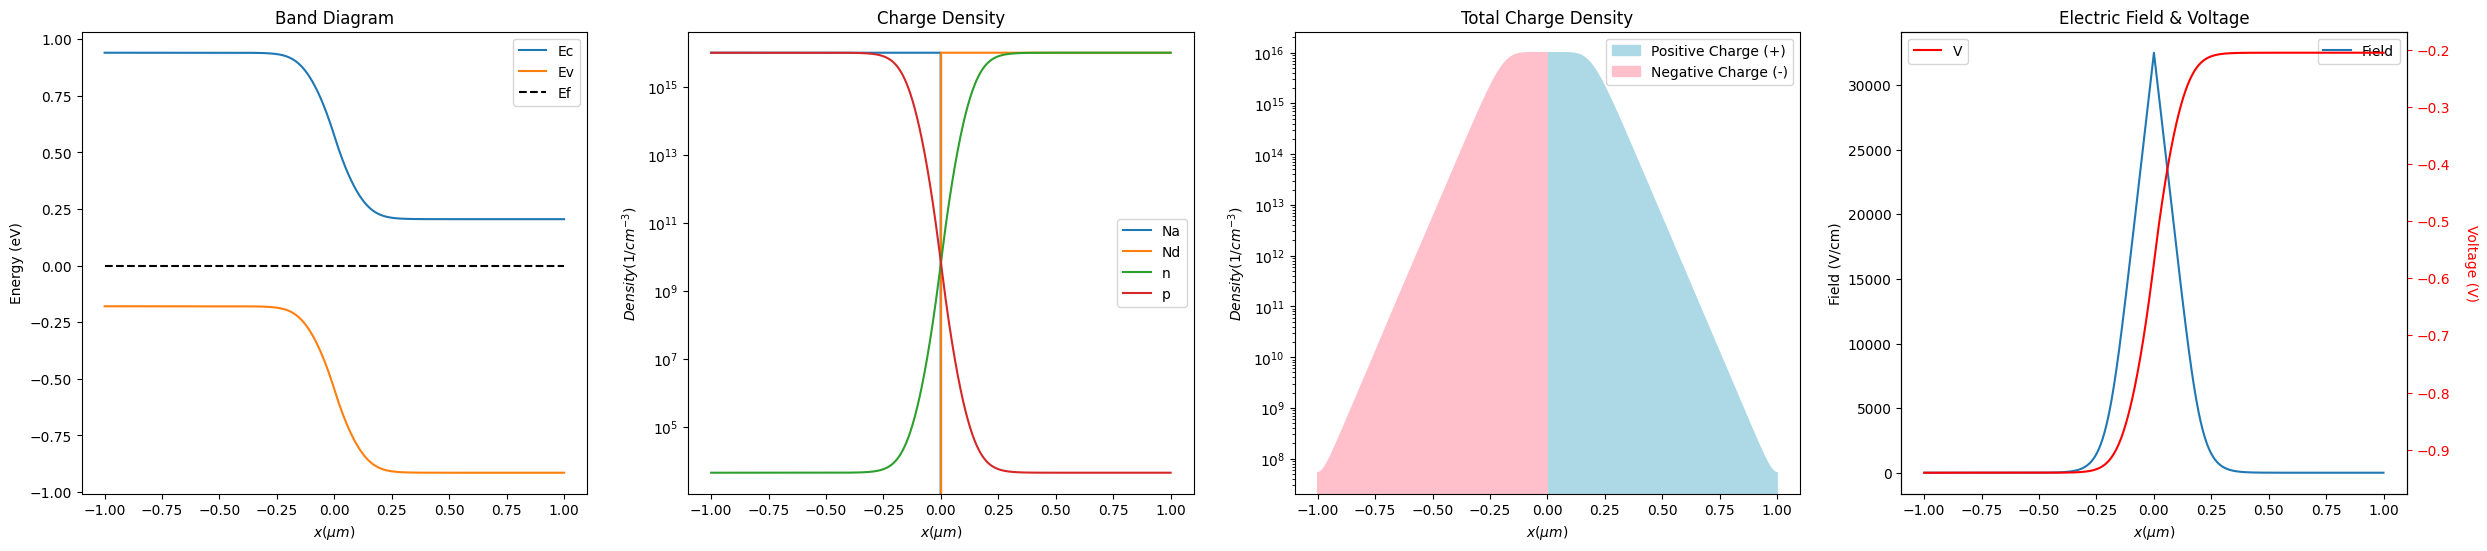

In [6]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

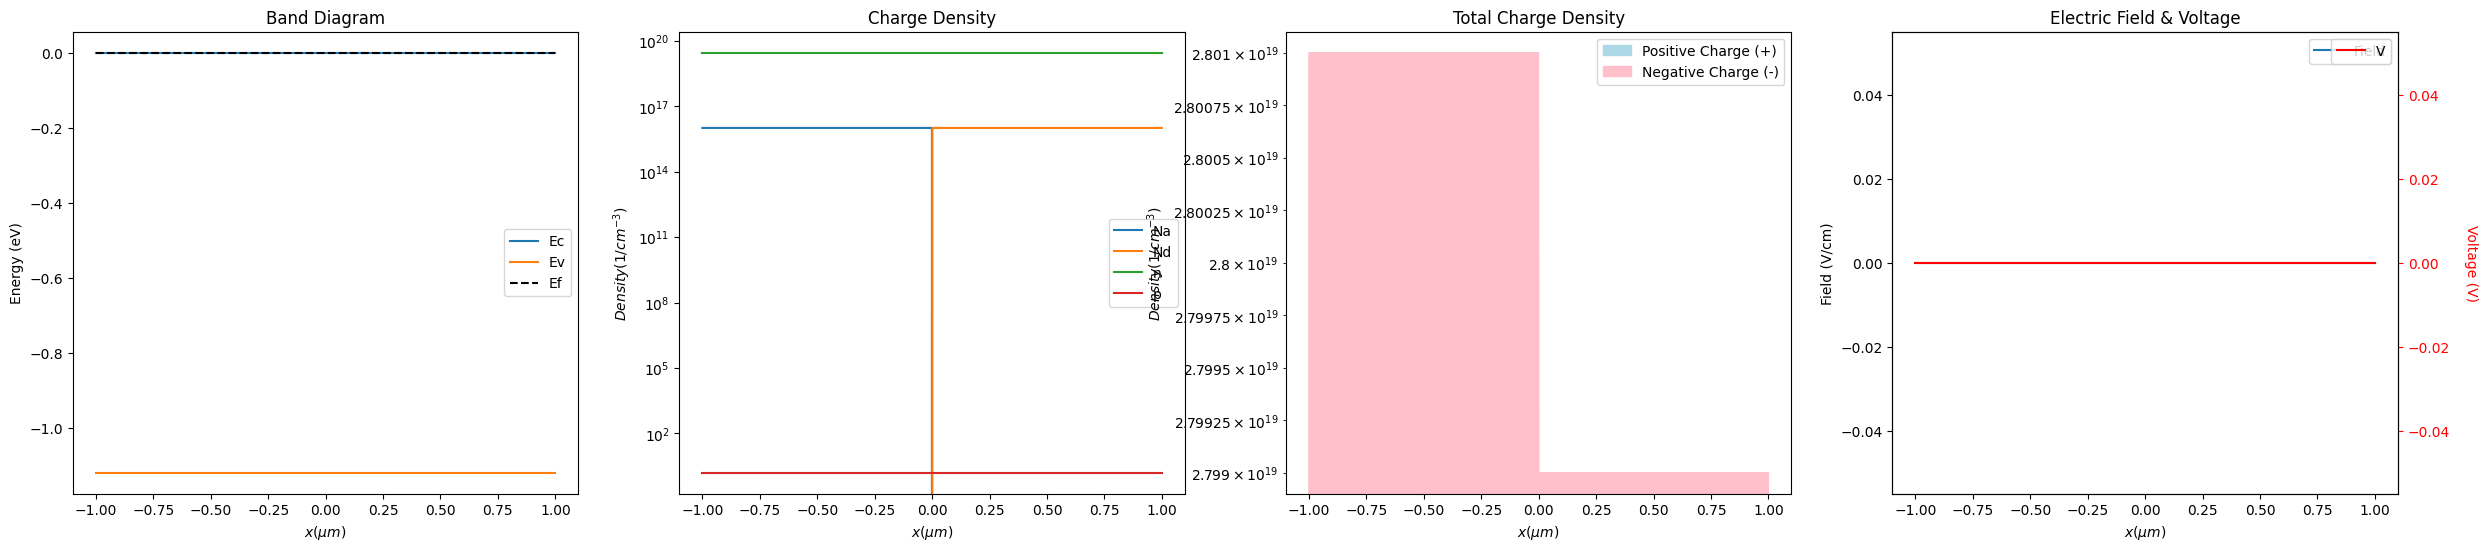

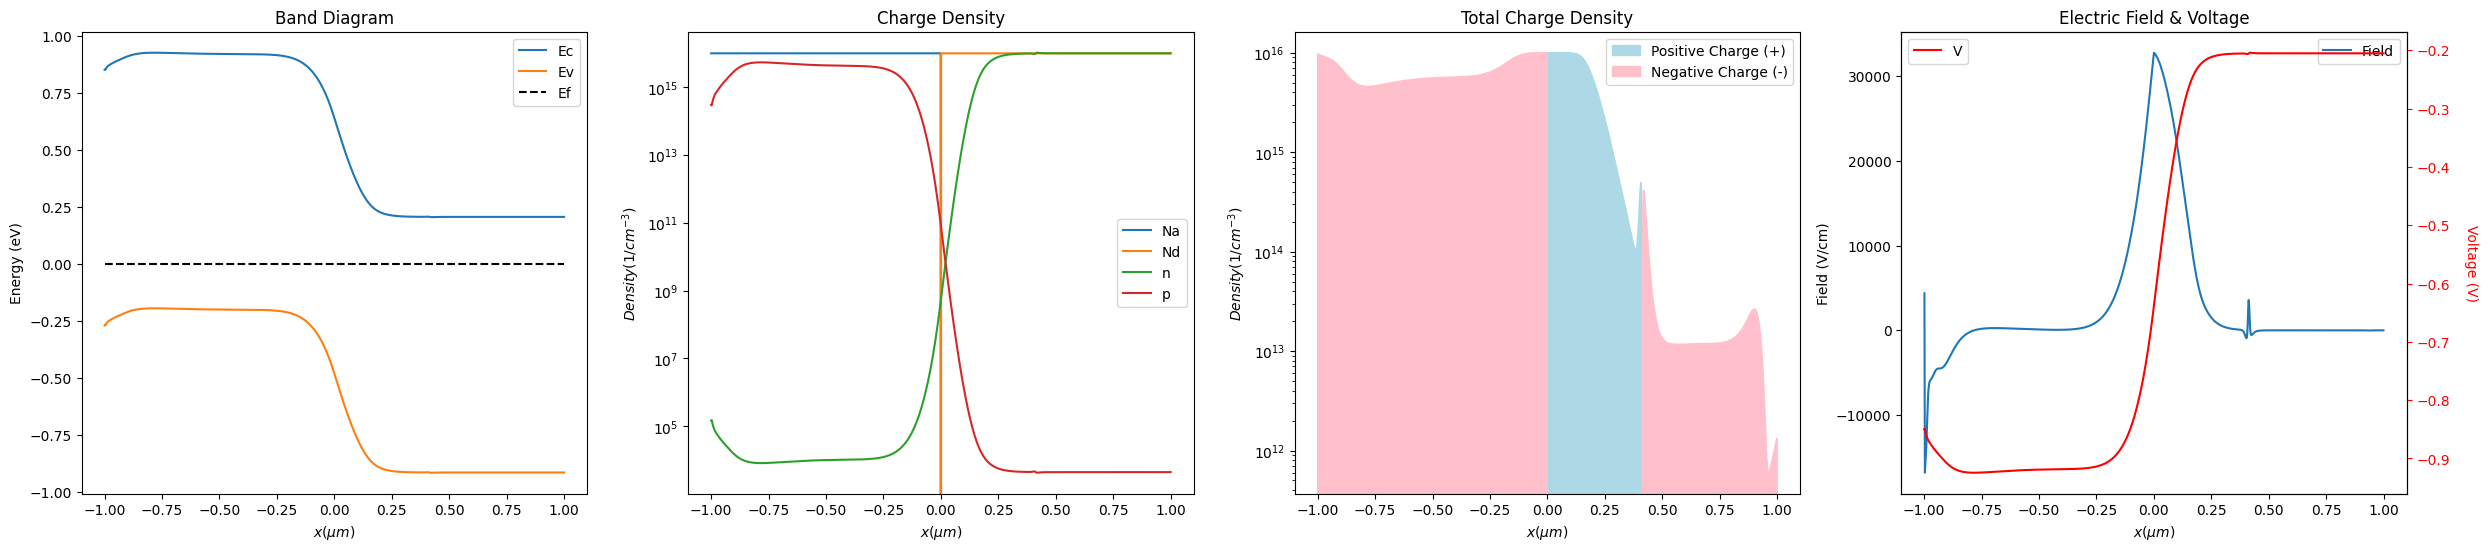

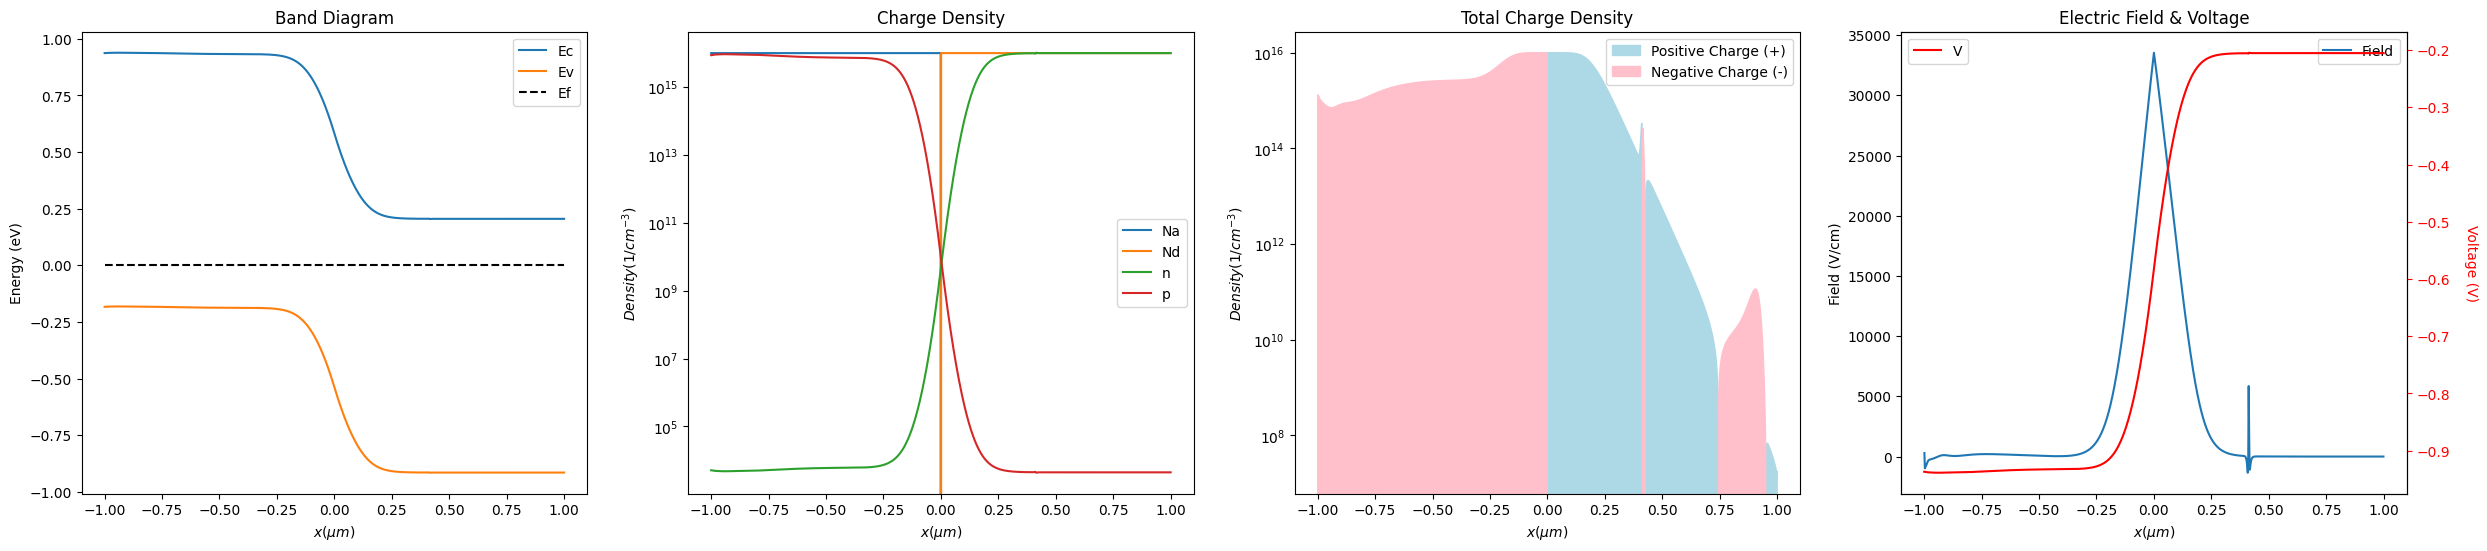

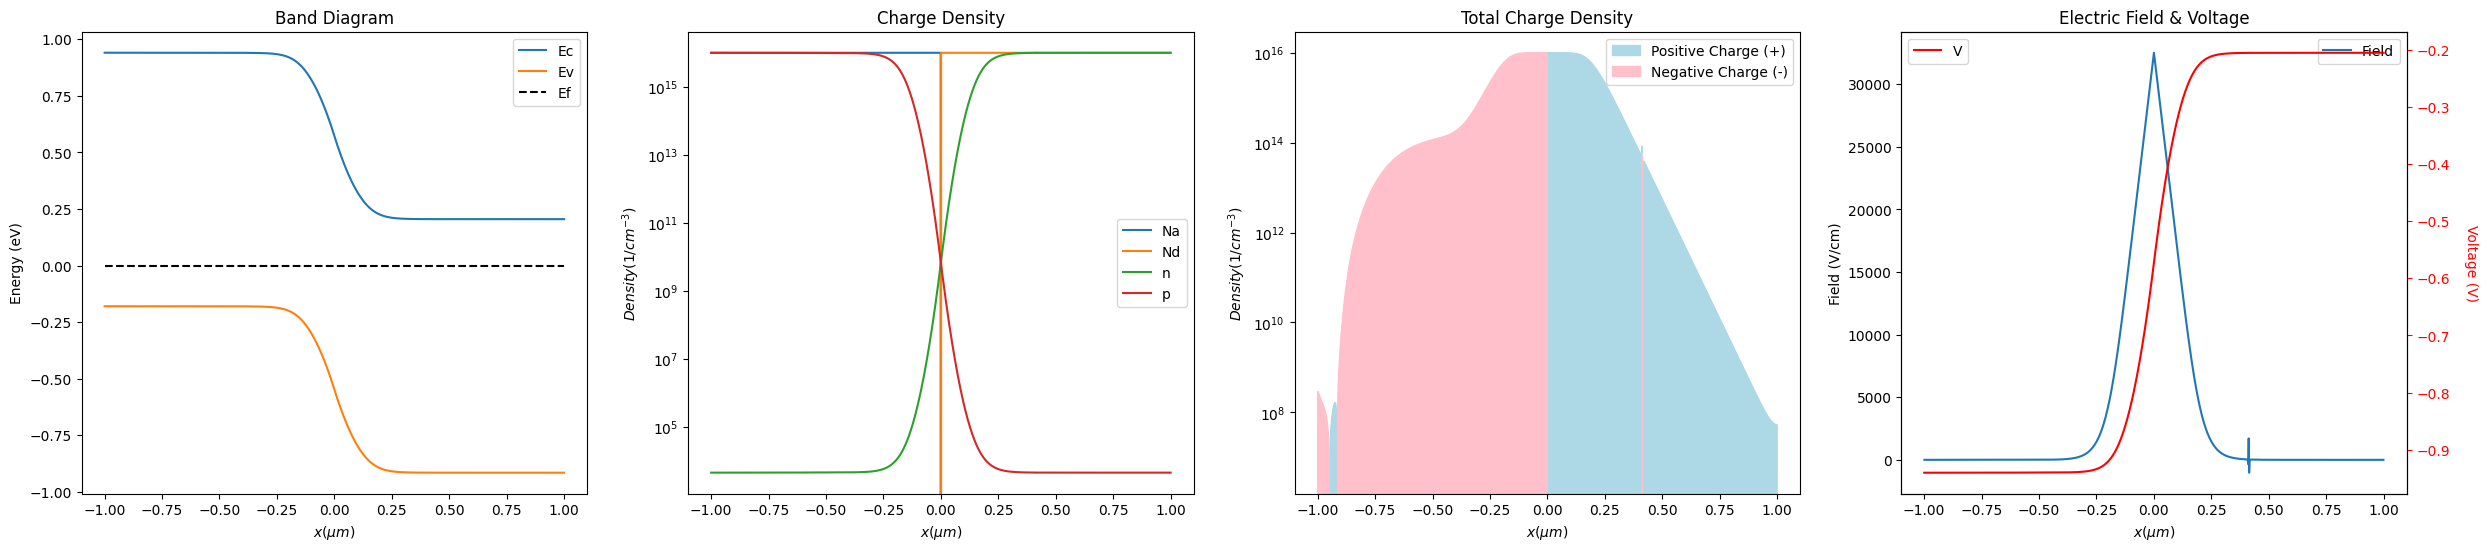

In [7]:
""" plot history """
step = 0
solver1D.plot_Poisson_1D(x=x, V=V_history[step], n=cal_n(x, V_history[step]), p=cal_p(x, V_history[step]), total_charge_density = cal_total_charge_density(x, V_history[step]), Ec=cal_Ec_from_V(x, V_history[step]), Ev=cal_Ev_from_V(x, V_history[step]), Field=solver1D.do_gradient(V_history[step], dx = x[1] - x[0]), Na=Na, Nd=Nd);

step = 50
solver1D.plot_Poisson_1D(x=x, V=V_history[step], n=cal_n(x, V_history[step]), p=cal_p(x, V_history[step]), total_charge_density = cal_total_charge_density(x, V_history[step]), Ec=cal_Ec_from_V(x, V_history[step]), Ev=cal_Ev_from_V(x, V_history[step]), Field=solver1D.do_gradient(V_history[step], dx = x[1] - x[0]), Na=Na, Nd=Nd);

step = 100
solver1D.plot_Poisson_1D(x=x, V=V_history[step], n=cal_n(x, V_history[step]), p=cal_p(x, V_history[step]), total_charge_density = cal_total_charge_density(x, V_history[step]), Ec=cal_Ec_from_V(x, V_history[step]), Ev=cal_Ev_from_V(x, V_history[step]), Field=solver1D.do_gradient(V_history[step], dx = x[1] - x[0]), Na=Na, Nd=Nd);

step = 300
solver1D.plot_Poisson_1D(x=x, V=V_history[step], n=cal_n(x, V_history[step]), p=cal_p(x, V_history[step]), total_charge_density = cal_total_charge_density(x, V_history[step]), Ec=cal_Ec_from_V(x, V_history[step]), Ev=cal_Ev_from_V(x, V_history[step]), Field=solver1D.do_gradient(V_history[step], dx = x[1] - x[0]), Na=Na, Nd=Nd);

# Si PN+ Junction (homojunction)

In [8]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-1e-4, 1e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e18, x_range=[0,np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [9]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)


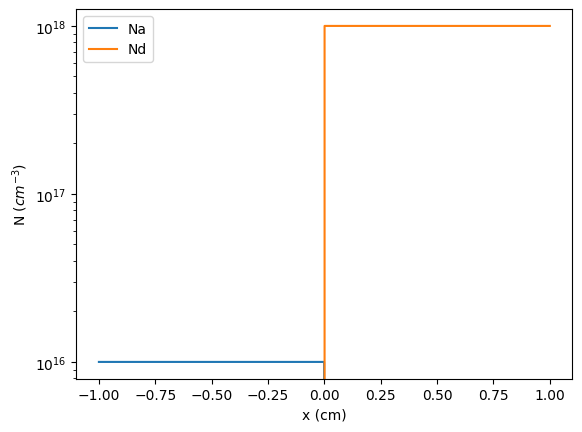

In [10]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [11]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 59%|█████▉    | 594/1000 [00:01<00:00, 453.06it/s]


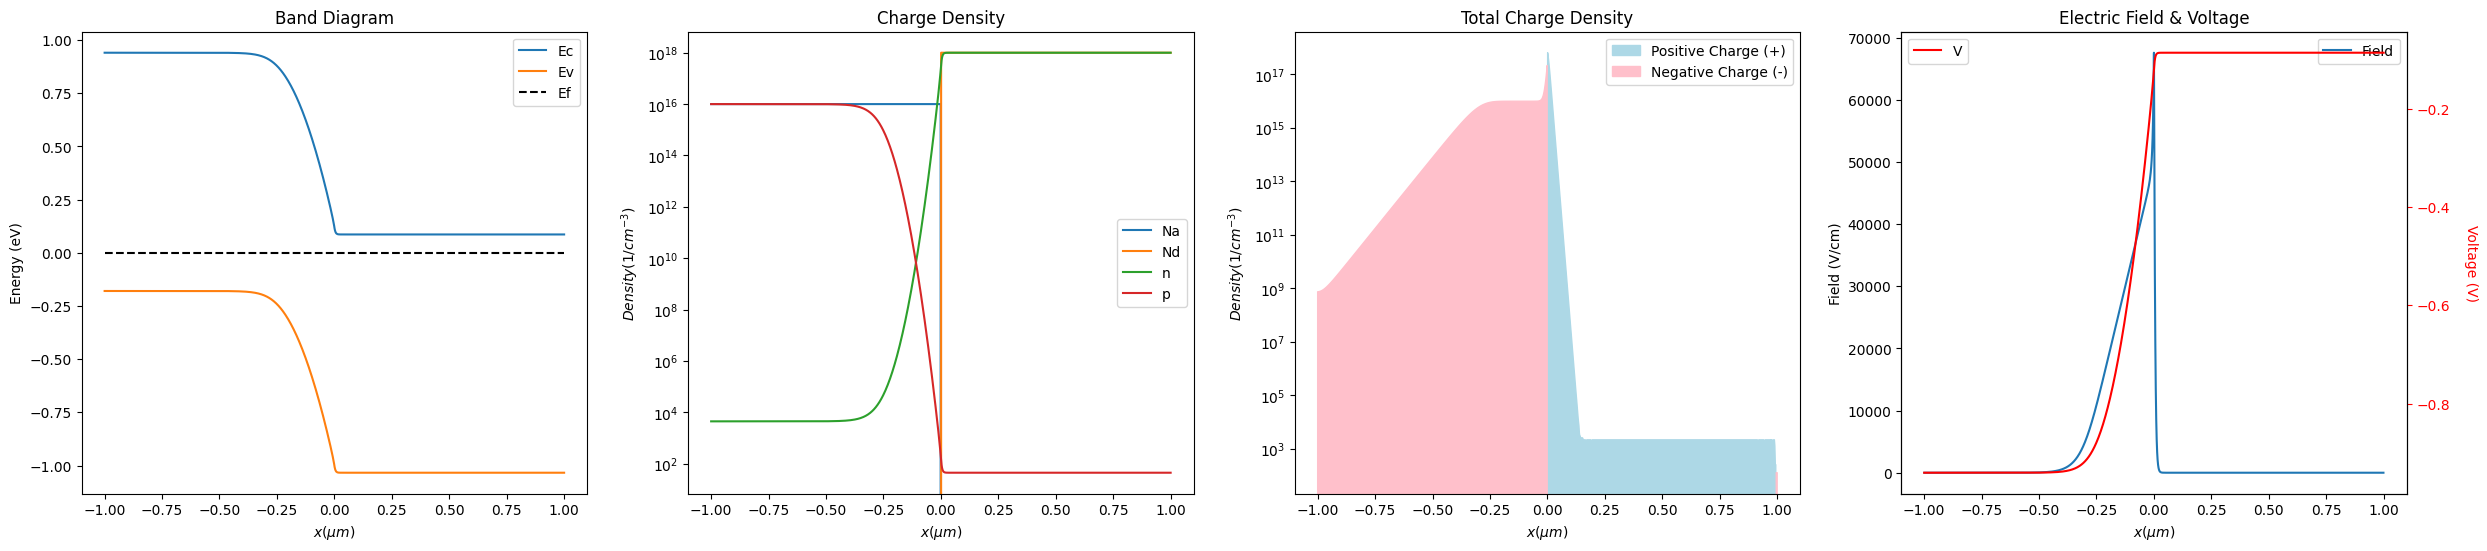

In [12]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si - GaAs Junction (Heterojunction)

In [13]:
""" constants setting """
T = 300
kT_q = k*T/e

materials = ['GaAs', 'Si']
x_range = np.array( [ [-np.inf, 0], [0, np.inf] ] )

x = np.linspace(-1e-4, 1e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=materials, x_range=x_range) / e 

In [14]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    Ec[x < 0] += EA['Si'] - EA['GaAs']
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ec = cal_Ec_from_V(x, V, q=q)
    return cal_Ev_from_Ec_at_different_x(x = x, Ec = Ec, materials = materials, x_range = x_range)
def cal_n(x, V):
    Ec = cal_Ec_from_V(x, V)
    return cal_electron_density_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_p(x, V):
    Ev = cal_Ev_from_V(x, V)
    return cal_hole_density_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dn_dV(x, V):
    Ec = cal_Ec_from_V(x, V)
    return -cal_dn_dEc_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dp_dV(x, V):
    Ev = cal_Ev_from_V(x, V)
    return -cal_dp_dEv_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)

def cal_total_charge_density(x, V):
    N  = Nd  - Na  + cal_p(x,  V)  - cal_n(x,  V)
    return N
def cal_dtotal_charge_density_dV(x, V):
    dN_dV  = cal_dp_dV(x,  V)  - cal_dn_dV(x,  V)
    return dN_dV

def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)

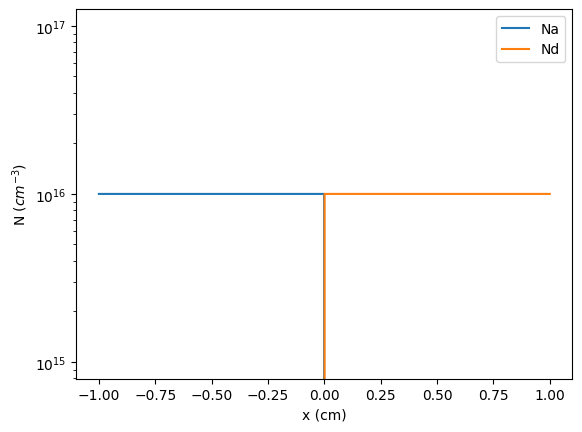

In [15]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [16]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, max_iter=2000, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 63%|██████▎   | 1269/2000 [00:03<00:01, 419.49it/s]


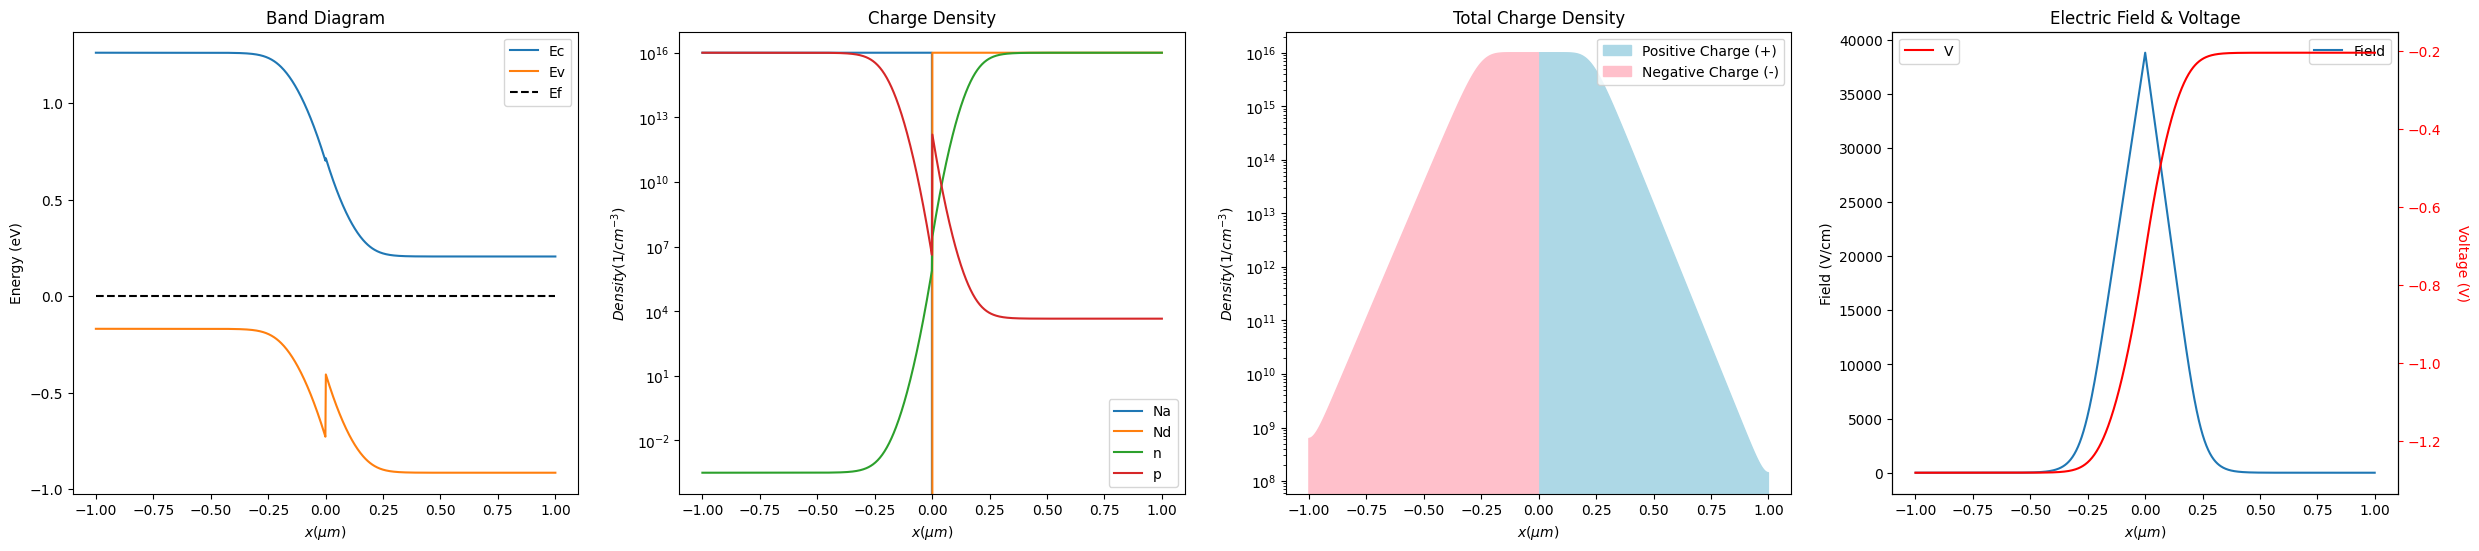

In [17]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si PIN Junction (homojunction)

In [18]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-1e-4, 1e-4, 1000) # cm
L = 0.1e-4
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,-L]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[L, np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [19]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)


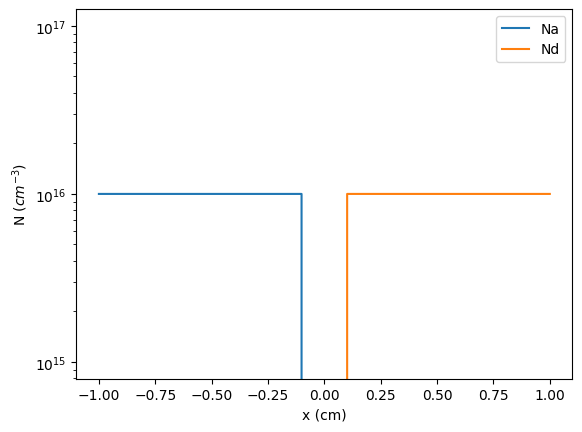

In [20]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [21]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, tol=1e-10, max_iter=2000)

 69%|██████▉   | 1375/2000 [00:03<00:01, 427.90it/s]


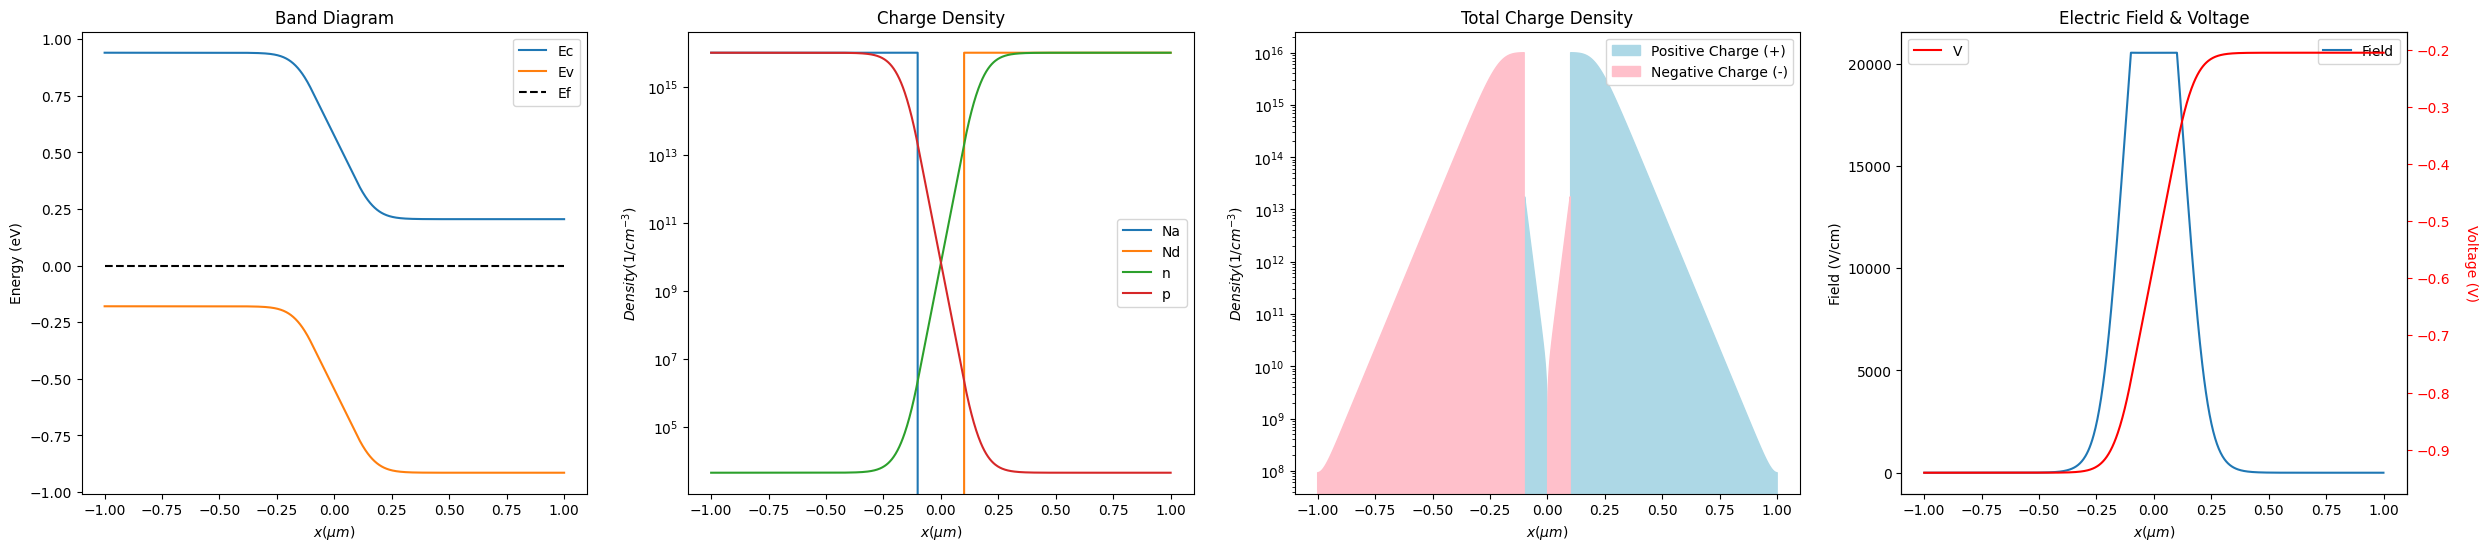

In [22]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si PNP Junction (homojunction)

In [23]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-2e-4, 2e-4, 1000) # cm
L = 1.0e-4
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[ [-np.inf,-L], [L,np.inf] ]) # cm^-3
Nd = dope_constant_donor(   x = x, Na = 1e16, x_range=[-L,L]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [24]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)



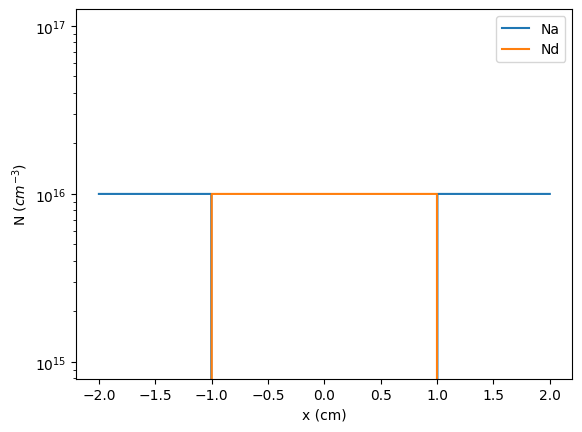

In [25]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [26]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 90%|████████▉ | 896/1000 [00:01<00:00, 484.64it/s]


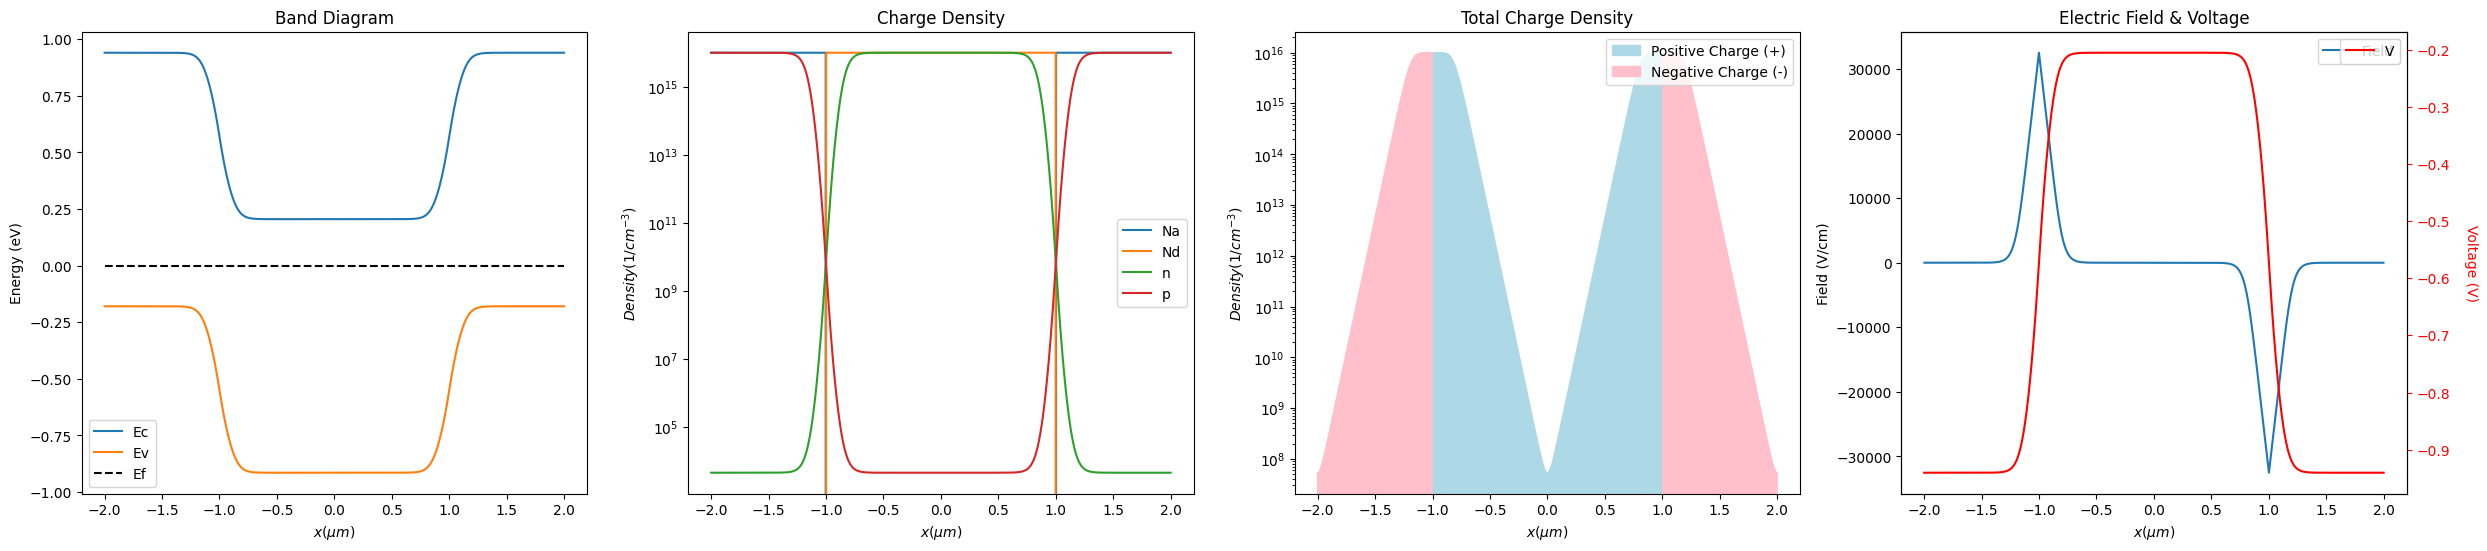

In [27]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si PNN+ junction

In [28]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

Nd1_value = 1e18 # cm^-3
Nd2_value = 1e16 # cm^-3

x = np.linspace(-2e-4, 2e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(   x = x, Na = Nd1_value, x_range=[0,np.inf]) # cm^-3
mask = np.bitwise_and( x>0, x<0.3e-4)
Nd[mask] = np.exp( np.log(Nd2_value) + ( np.log(Nd1_value) - np.log(Nd2_value)) * x[mask] / 0.3e-4 )

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [29]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)



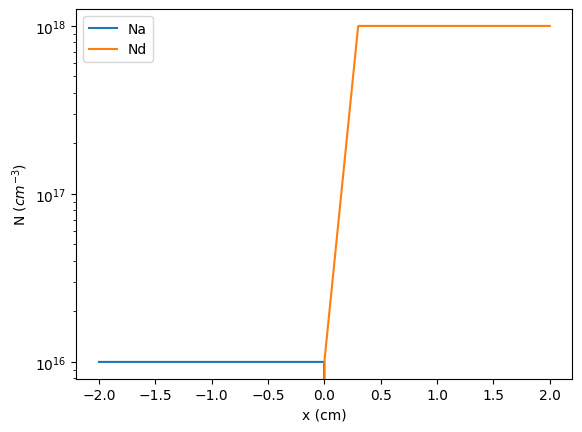

In [30]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [31]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=4000)

 65%|██████▌   | 2614/4000 [00:05<00:02, 495.59it/s]


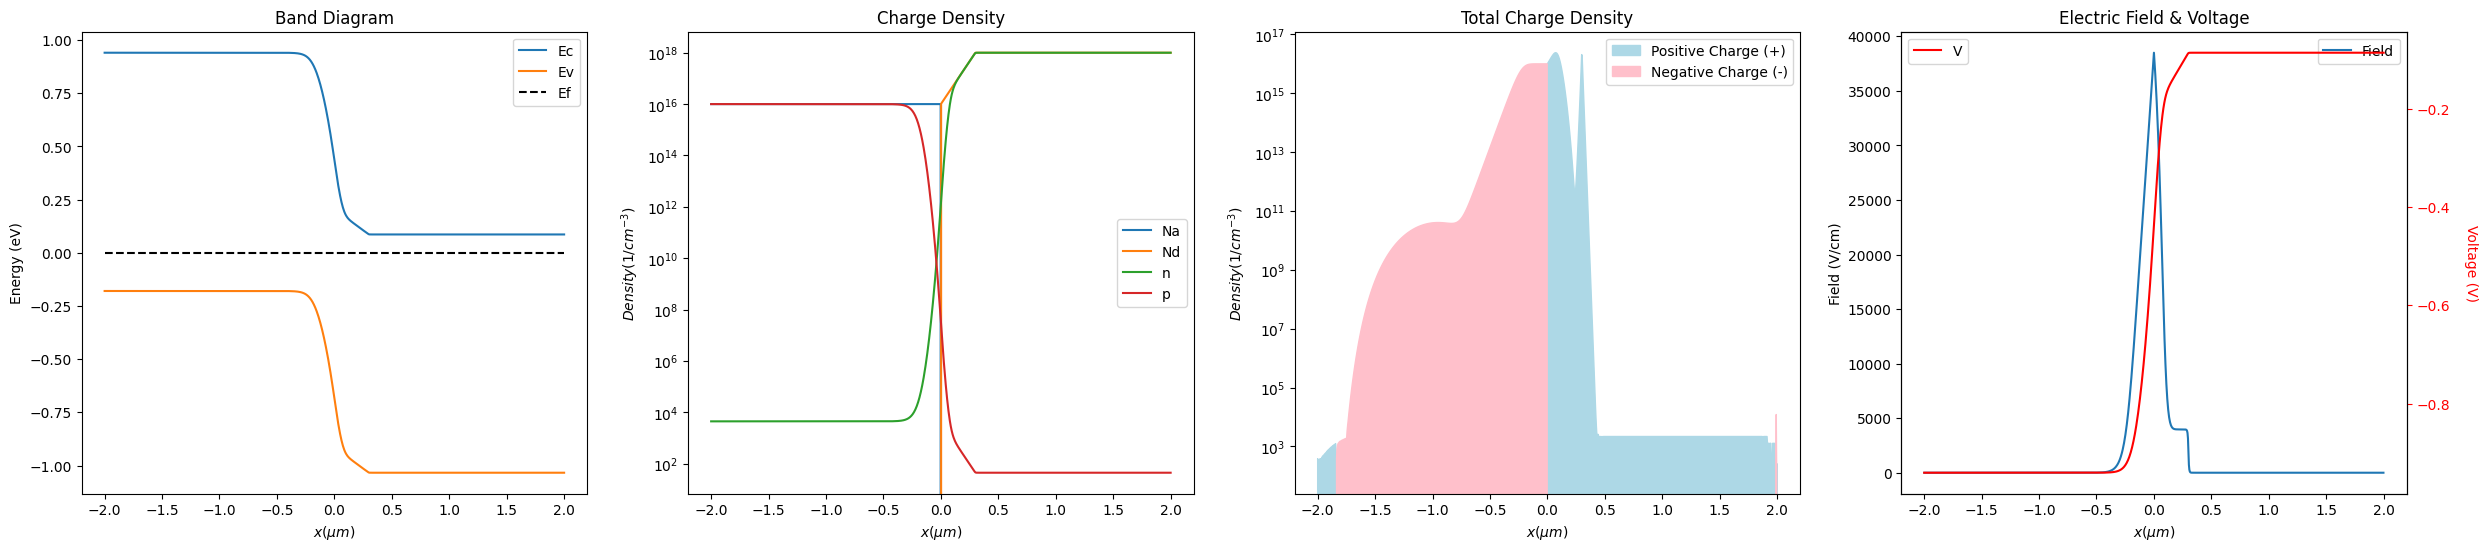

In [32]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si PNP Junction / Coupled

In [33]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-2e-4, 2e-4, 1000) # cm
L = 0.1e-4
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[ [-np.inf,-L], [L,np.inf] ]) # cm^-3
Nd = dope_constant_donor(   x = x, Na = 1e16, x_range=[-L,L]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [34]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)



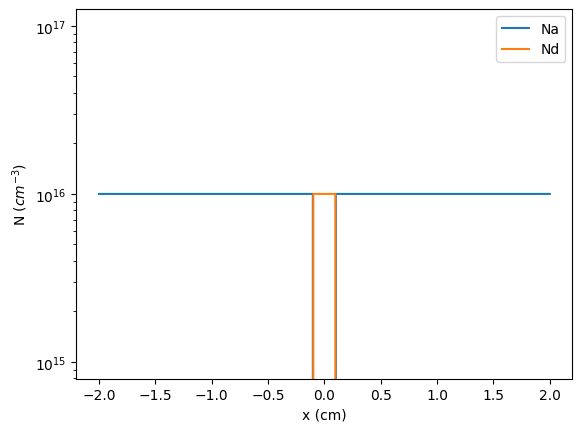

In [35]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [36]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=10000)

 67%|██████▋   | 6660/10000 [00:13<00:06, 494.35it/s]


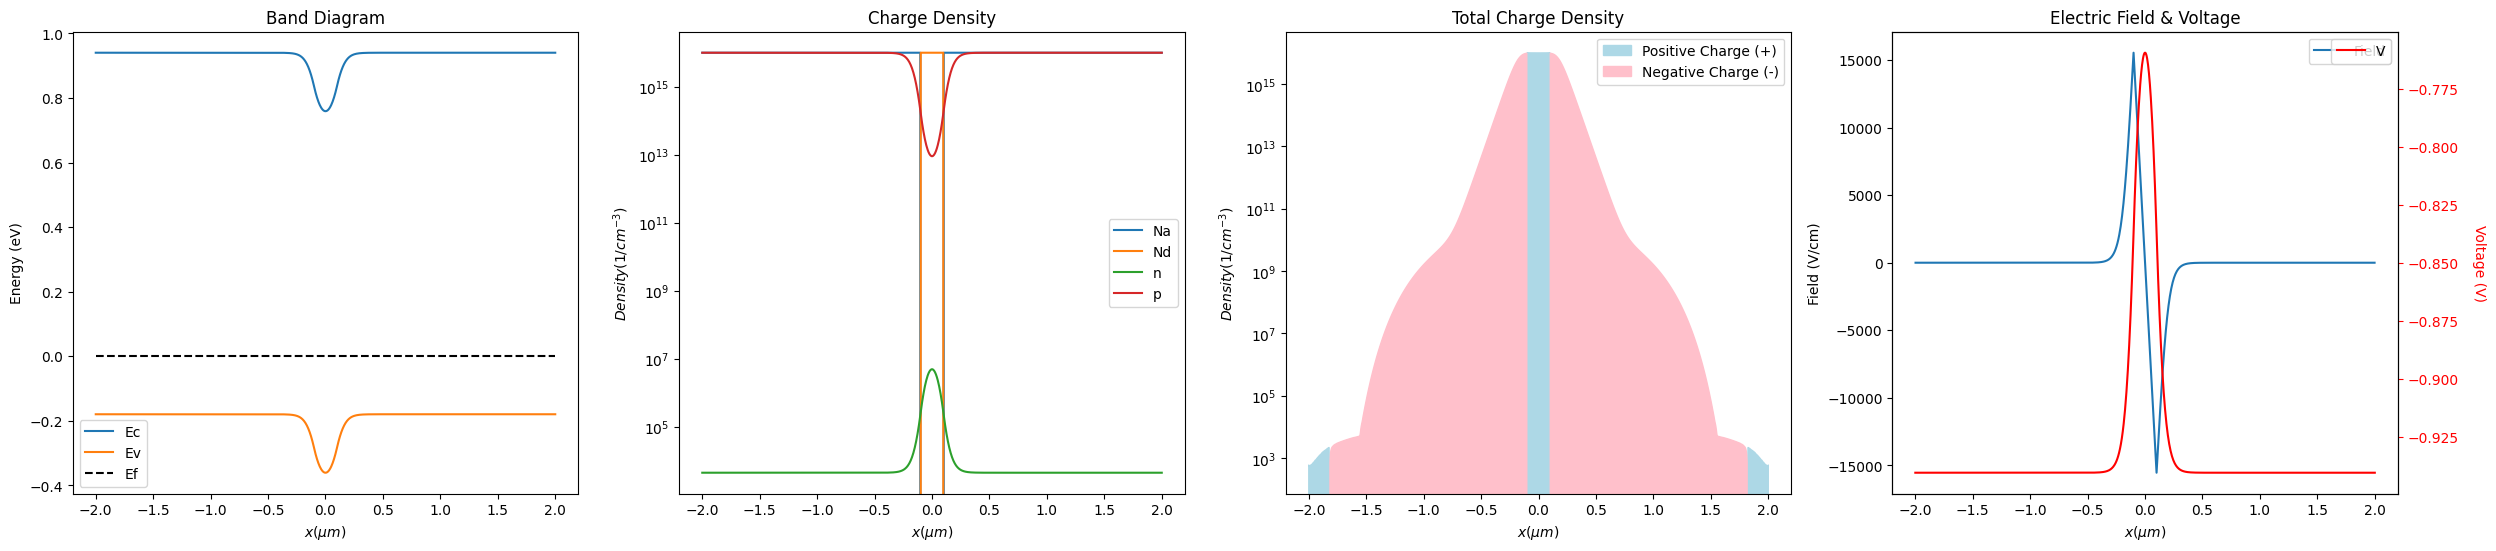

In [37]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N + BC? 

In [38]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(0, 1e-4, 1000) # cm
Na = np.zeros_like(x)
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [39]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)


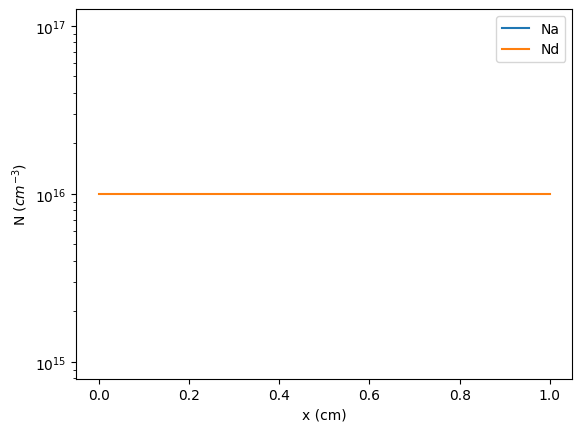

In [40]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [41]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, v0= 0, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000)

 19%|█▉        | 383/2000 [00:00<00:03, 492.20it/s]


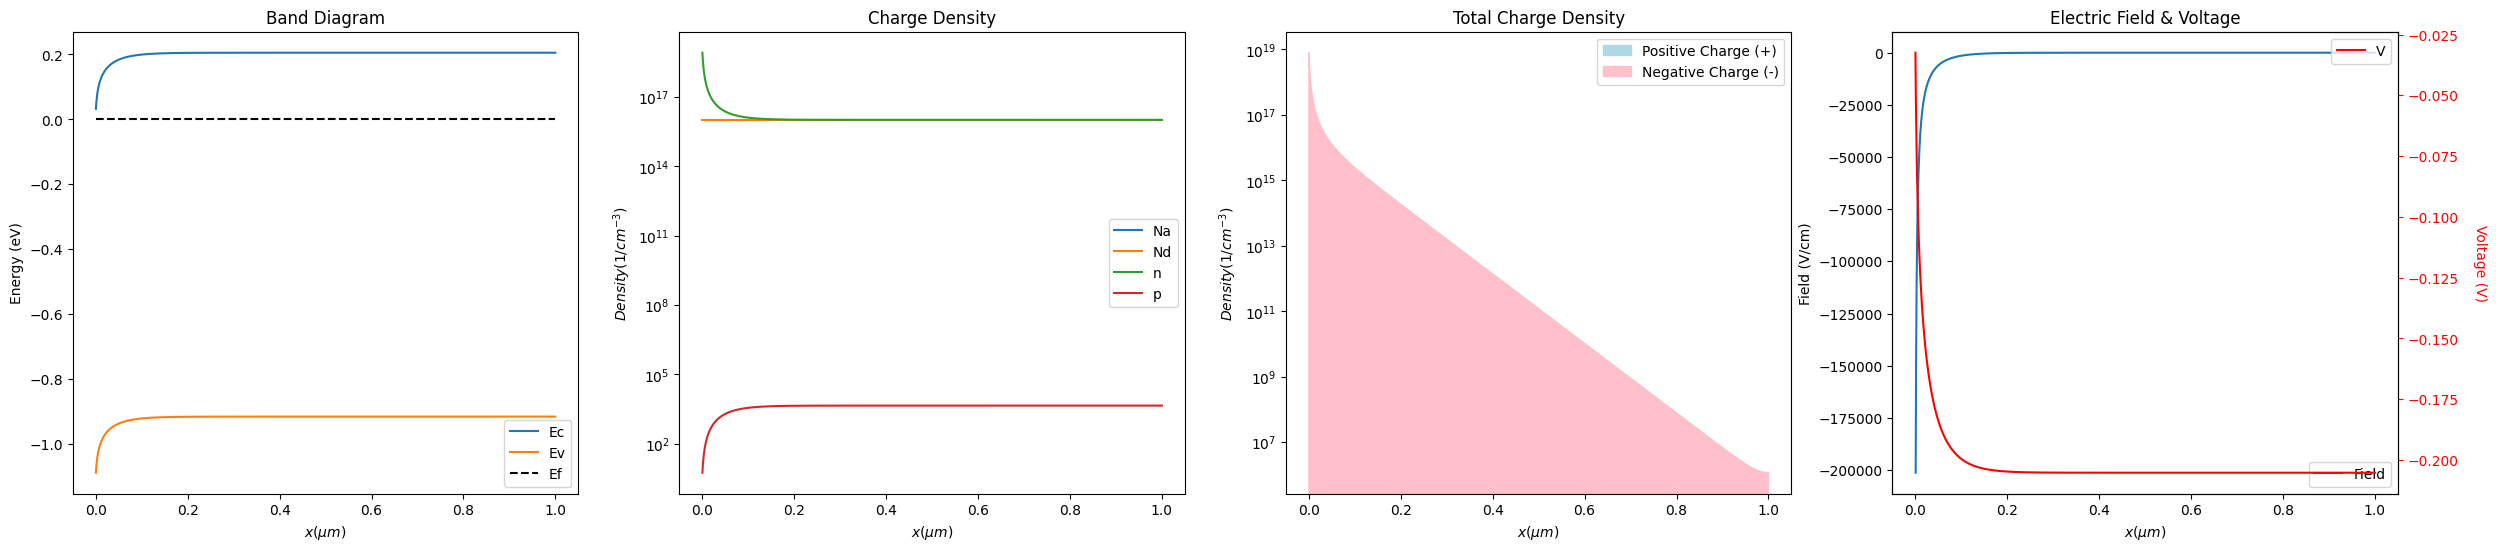

In [42]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N + BC? -> Metal - Semi junction

In [43]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(0, 1e-4, 1000) # cm
Na = np.zeros_like(x)
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [44]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)


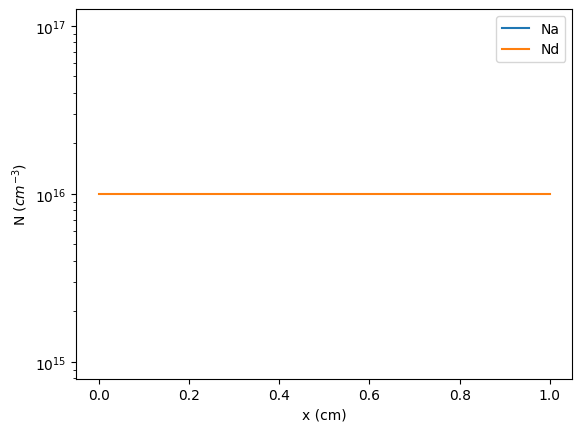

In [45]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [46]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=1000, tol=1e-10)

 21%|██        | 208/1000 [00:00<00:01, 422.53it/s]


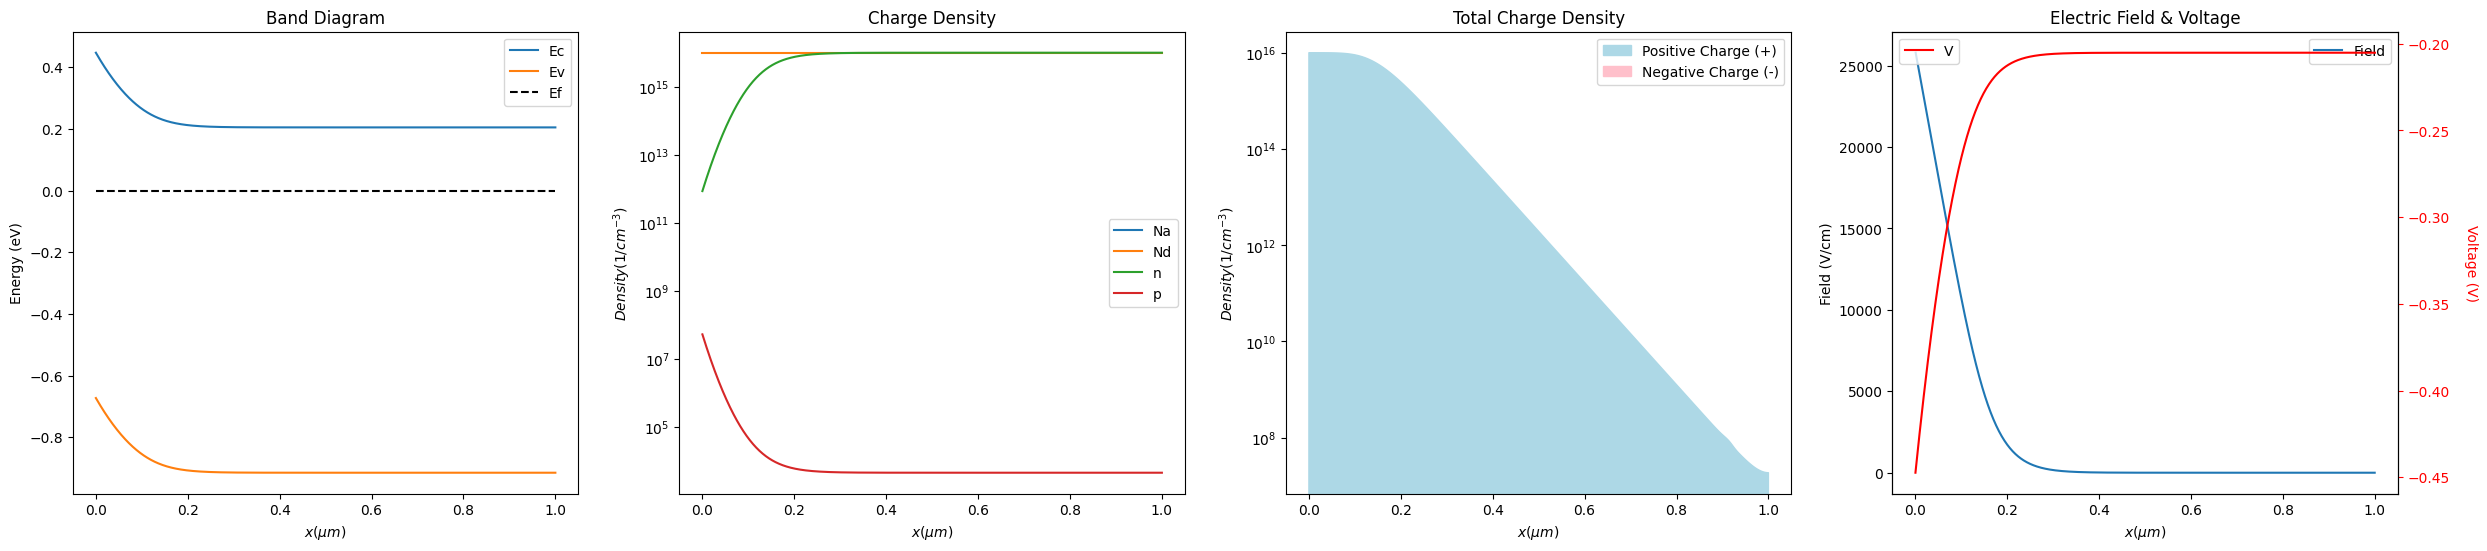

In [47]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N+ N / Heavy Doping+ BC? -> Metal - Semi junction

In [48]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(0, 1e-4, 1000) # cm
Na = np.zeros_like(x)
Nd = dope_constant_donor(x = x, Na = 6e17, x_range=[0,0.02e-4]) + dope_constant_donor(x = x, Na = 1e16, x_range=[0.02e-4,np.inf]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [49]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)



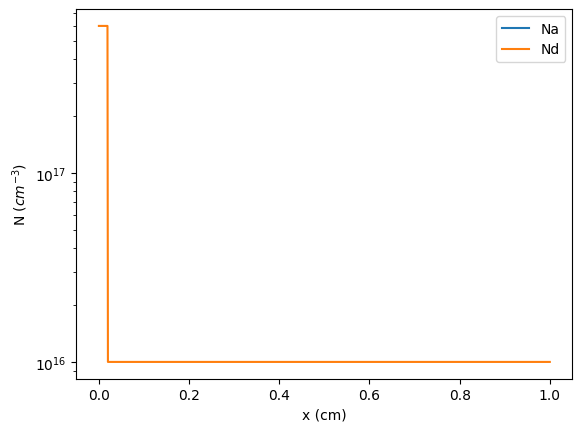

In [50]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [51]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000, tol=1e-11)

 76%|███████▌  | 1522/2000 [00:03<00:01, 444.01it/s]


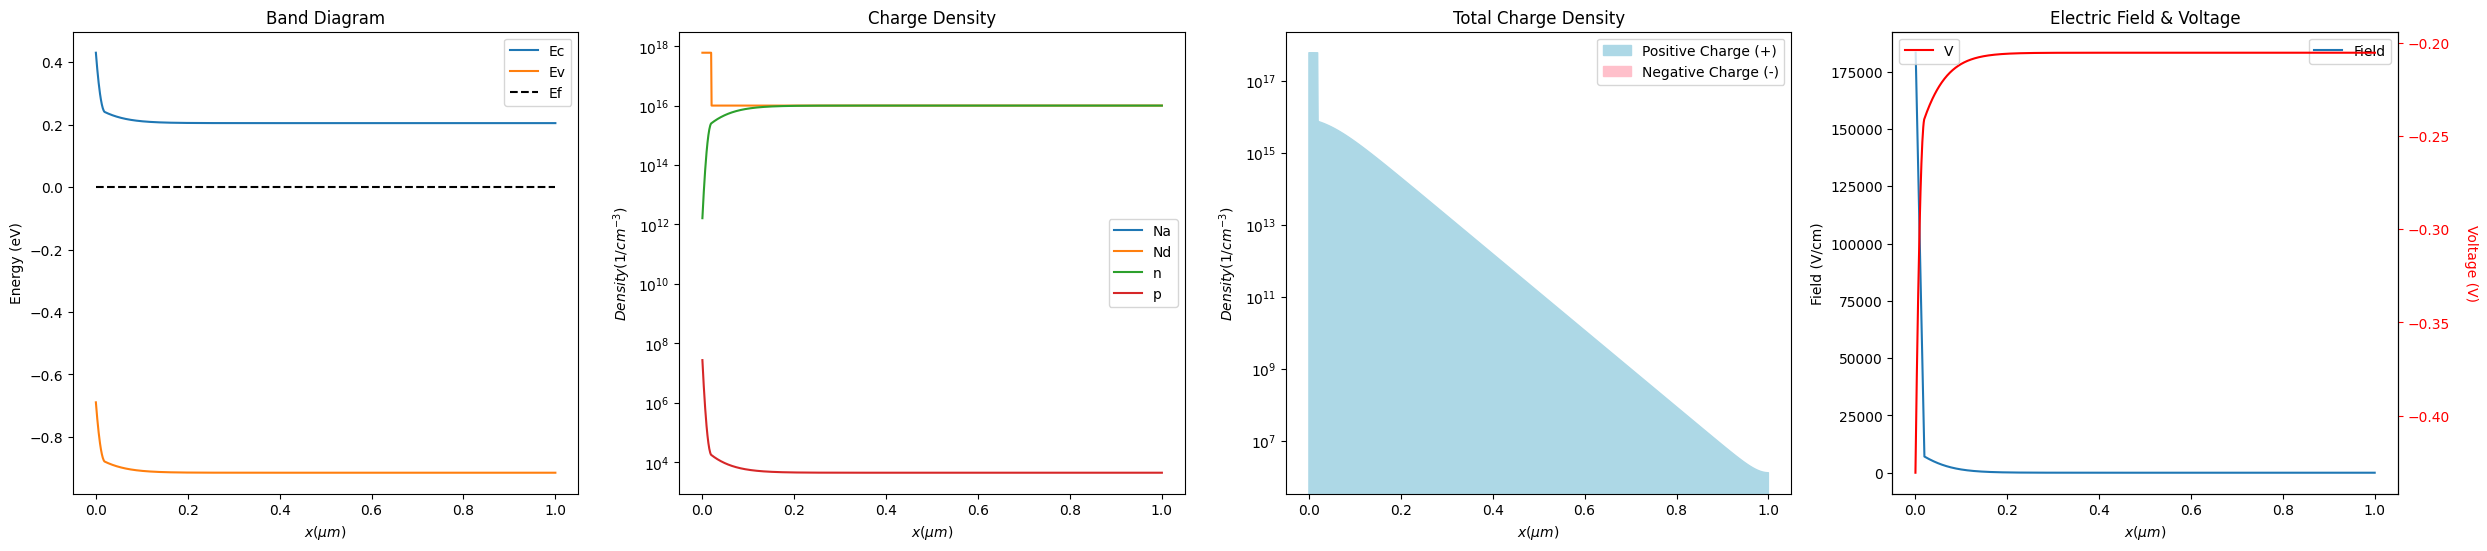

In [52]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si - GaAs Junction (Heterojunction) + Dit (Acceptor Like)

In [53]:
""" constants setting """
T = 300
kT_q = k*T/e

materials = ['GaAs', 'Si']
x_range = np.array( [ [-np.inf, 0], [0, np.inf] ] )

x = np.linspace(-1e-4, 1e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=materials, x_range=x_range) / e 

N_dit = 3e16 # cm^-2
E_dit_sigma = 0.02 # eV

In [54]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    Ec[x < 0] += EA['Si'] - EA['GaAs']
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ec = cal_Ec_from_V(x, V, q=q)
    return cal_Ev_from_Ec_at_different_x(x = x, Ec = Ec, materials = materials, x_range = x_range)
def cal_n(x, V):
    Ec = cal_Ec_from_V(x, V)
    return cal_electron_density_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_p(x, V):
    Ev = cal_Ev_from_V(x, V)
    return cal_hole_density_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dn_dV(x, V):
    Ec = cal_Ec_from_V(x, V)
    return -cal_dn_dEc_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dp_dV(x, V):
    Ev = cal_Ev_from_V(x, V)
    return -cal_dp_dEv_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)

def cal_E_dit_mean(x, V):
    E_dit_mean = np.zeros_like(x)
    mask = np.bitwise_and( x>0, x<0.05e-4)

    Ec = cal_Ec_from_V(x[mask], V[mask])
    E_dit_mean[mask] = Ec - 0.8*Eg['Si']
    return E_dit_mean
def cal_Dit(x, V):
    Dit = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
    
    # shape = (1000, x size) / intergrate over E
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    DOS  = np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma 
    prob = f_FD * DOS
    
    
    # intergration
    Dit[mask] = N_dit * ( 0.5 - np.trapz(y = prob, x = E, axis=0) )
    return Dit
def cal_dDit_dV(x, V):
    dDit_dEc = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])

    # shape = (1000, x size) / dEc = dE_dit_mean
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    dDOS_dEc = (E - E_dit_mean) * np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma**3
    dprob_dEc = f_FD * dDOS_dEc

    # intergration
    dDit_dEc[mask] = - N_dit * np.trapz(y = dprob_dEc, x = E, axis=0)
    return -dDit_dEc

def cal_total_charge_density(x, V):
    N = np.zeros_like(x)
    N  = Nd - Na  + cal_p(x,  V)  - cal_n(x,  V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    N[mask] += cal_Dit(x[mask], V[mask])
    return N

def src_fun(x, V):
    src = - (1/epsilon_q) * cal_total_charge_density(x, V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    src[mask] -= (1/epsilon_q[mask]) * cal_Dit(x[mask], V[mask])
    return src
def d_src_dV_fun(x, V):
    d_src_dV = -(1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)
    
    mask = np.bitwise_and( x>0, x<0.05e-4)
    d_src_dV[mask] -= (1/epsilon_q[mask]) * cal_dDit_dV(x[mask], V[mask])
    return d_src_dV


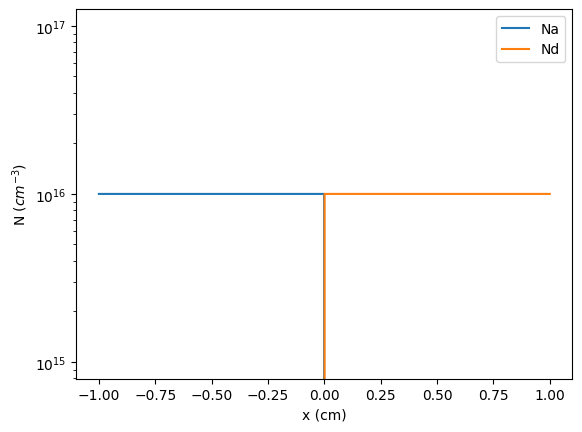

In [55]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [56]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, max_iter=3000, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, tol=1e-10)

 78%|███████▊  | 2346/3000 [00:12<00:03, 187.85it/s]


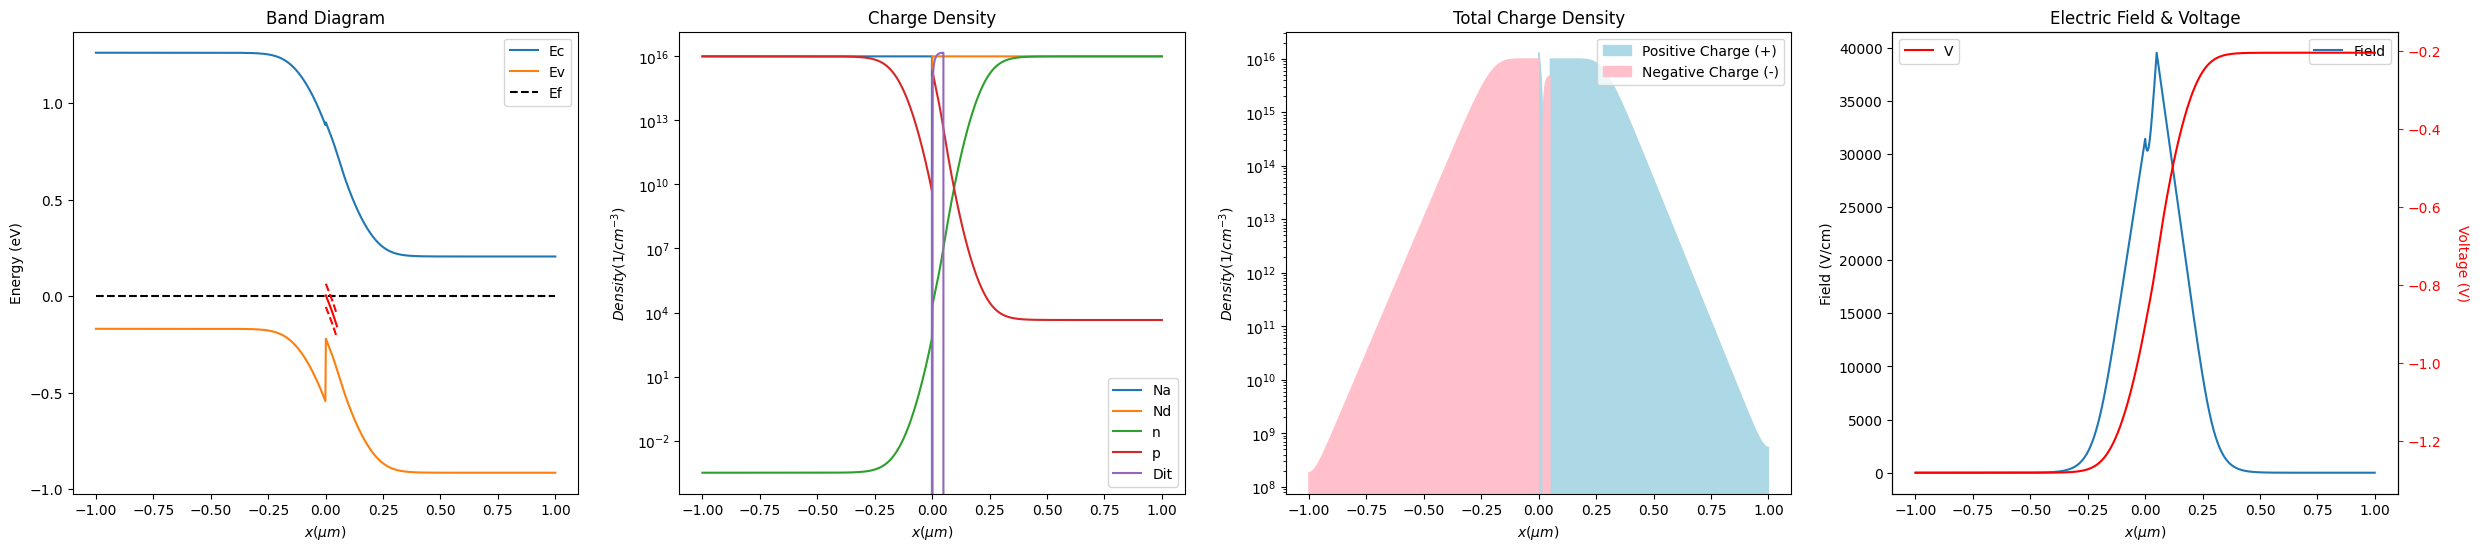

In [57]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

ax = solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);
ax[1].plot(x * 1e4, np.abs(cal_Dit(x, V)), label='Dit')
ax[1].legend()

mask = np.bitwise_and( x>0, x<0.05e-4)
E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
ax[0].plot( x[mask]*1e4, E_dit_mean, 'r')
ax[0].plot( x[mask]*1e4, E_dit_mean+3*E_dit_sigma, 'r--')
ax[0].plot( x[mask]*1e4, E_dit_mean-3*E_dit_sigma, 'r--')

# Si - GaAs Junction (Heterojunction) + Dit (Donor Like)

In [58]:
""" constants setting """
T = 300
kT_q = k*T/e

materials = ['GaAs', 'Si']
x_range = np.array( [ [-np.inf, 0], [0, np.inf] ] )

x = np.linspace(-1e-4, 1e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=materials, x_range=x_range) / e 


N_dit = 3e16 # cm^-2
E_dit_sigma = 0.02 # eV

In [59]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    Ec[x < 0] += EA['Si'] - EA['GaAs']
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ec = cal_Ec_from_V(x, V, q=q)
    return cal_Ev_from_Ec_at_different_x(x = x, Ec = Ec, materials = materials, x_range = x_range)
def cal_n(x, V):
    Ec = cal_Ec_from_V(x, V)
    return cal_electron_density_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_p(x, V):
    Ev = cal_Ev_from_V(x, V)
    return cal_hole_density_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dn_dV(x, V):
    Ec = cal_Ec_from_V(x, V)
    return -cal_dn_dEc_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dp_dV(x, V):
    Ev = cal_Ev_from_V(x, V)
    return -cal_dp_dEv_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)

def cal_E_dit_mean(x, V):
    E_dit_mean = np.zeros_like(x)
    mask = np.bitwise_and( x>0, x<0.05e-4)

    Ec = cal_Ec_from_V(x[mask], V[mask])
    E_dit_mean[mask] = Ec - 0.2*Eg['Si']
    return E_dit_mean

def cal_Dit(x, V):
    Dit = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
    
    # shape = (1000, x size) / intergrate over E
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    DOS  = np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma 
    prob = f_FD * DOS
    
    
    # intergration
    Dit[mask] = N_dit * ( 0.5 - np.trapz(y = prob, x = E, axis=0) )
    return Dit
def cal_dDit_dV(x, V):
    dDit_dEc = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])

    # shape = (1000, x size) / dEc = dE_dit_mean
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    dDOS_dEc = N_dit * (E - E_dit_mean) * np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma**3
    dprob_dEc = f_FD * dDOS_dEc

    # intergration
    dDit_dEc[mask] = - np.trapz(y = dprob_dEc, x = E, axis=0)
    return -dDit_dEc

def cal_total_charge_density(x, V):
    N = np.zeros_like(x)
    N  = Nd - Na  + cal_p(x,  V)  - cal_n(x,  V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    N[mask] += cal_Dit(x[mask], V[mask])
    return N

def src_fun(x, V):
    src = - (1/epsilon_q) * cal_total_charge_density(x, V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    src[mask] -= (1/epsilon_q[mask]) * cal_Dit(x[mask], V[mask])
    return src
def d_src_dV_fun(x, V):
    d_src_dV = -(1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)
    
    mask = np.bitwise_and( x>0, x<0.05e-4)
    d_src_dV[mask] -= (1/epsilon_q[mask]) * cal_dDit_dV(x[mask], V[mask])
    return d_src_dV

In [60]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, max_iter=10000, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 11%|█▏        | 1147/10000 [00:05<00:42, 210.77it/s]


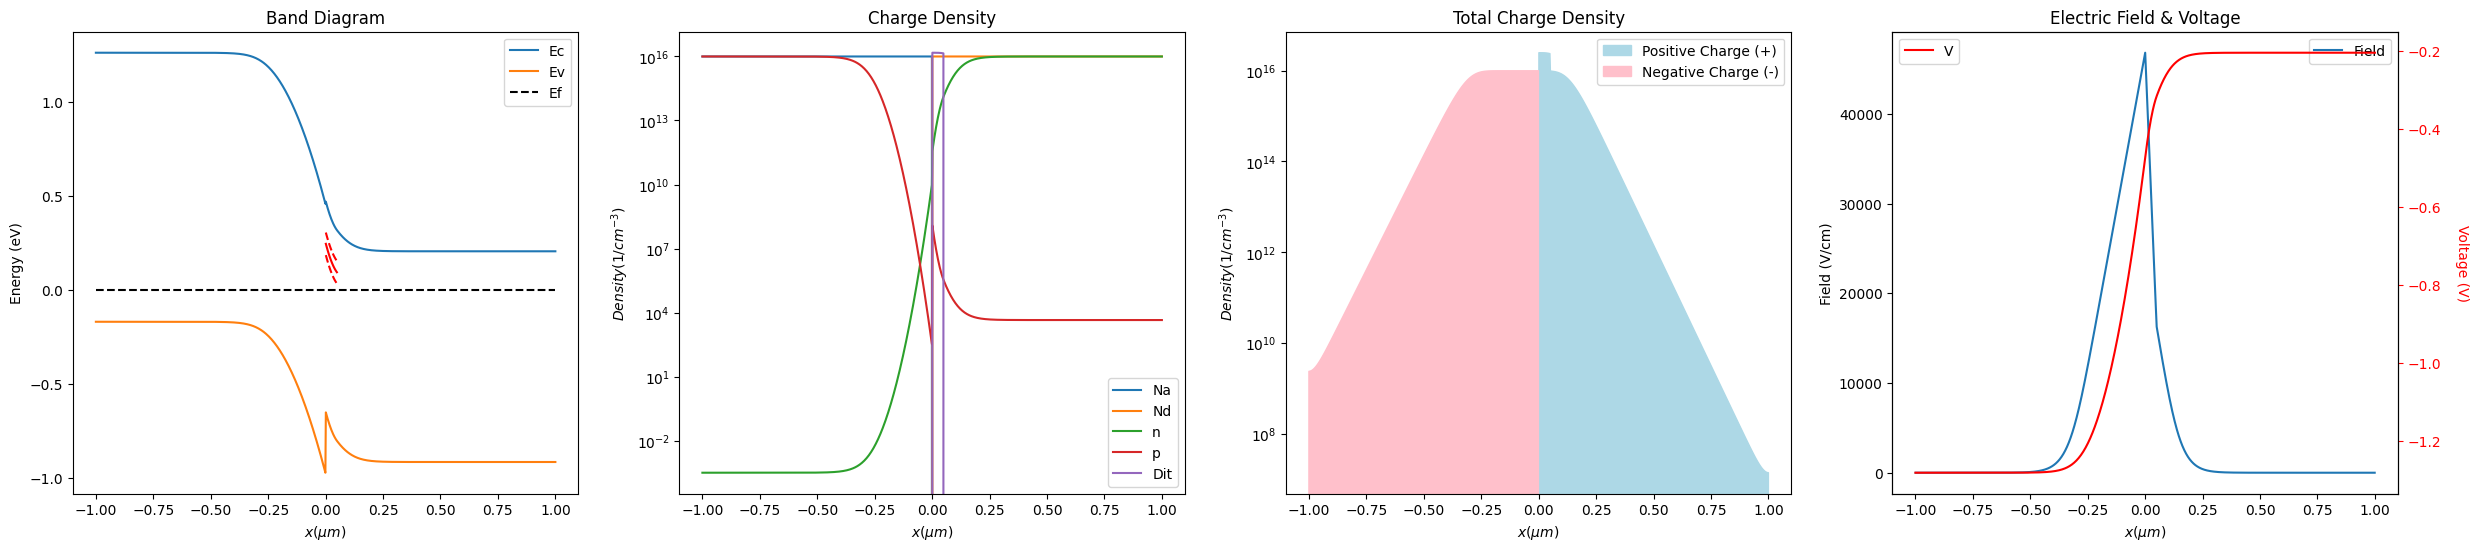

In [61]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

ax = solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);
ax[1].plot(x * 1e4, np.abs(cal_Dit(x, V)), label='Dit')
ax[1].legend()

mask = np.bitwise_and( x>0, x<0.05e-4)
E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
ax[0].plot( x[mask]*1e4, E_dit_mean, 'r')
ax[0].plot( x[mask]*1e4, E_dit_mean+3*E_dit_sigma, 'r--')
ax[0].plot( x[mask]*1e4, E_dit_mean-3*E_dit_sigma, 'r--')

# Si - GaAs Junction (Heterojunction) + Dit 

In [62]:
""" constants setting """
T = 300
kT_q = k*T/e

materials = ['GaAs', 'Si']
x_range = np.array( [ [-np.inf, 0], [0, np.inf] ] )

x = np.linspace(-1e-4, 1e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=materials, x_range=x_range) / e 

N_dit = 4e16 # cm^-2
E_dit_sigma = 0.03 # eV

In [63]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    Ec[x < 0] += EA['Si'] - EA['GaAs']
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ec = cal_Ec_from_V(x, V, q=q)
    return cal_Ev_from_Ec_at_different_x(x = x, Ec = Ec, materials = materials, x_range = x_range)
def cal_n(x, V):
    Ec = cal_Ec_from_V(x, V)
    return cal_electron_density_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_p(x, V):
    Ev = cal_Ev_from_V(x, V)
    return cal_hole_density_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dn_dV(x, V):
    Ec = cal_Ec_from_V(x, V)
    return -cal_dn_dEc_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dp_dV(x, V):
    Ev = cal_Ev_from_V(x, V)
    return -cal_dp_dEv_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)

def cal_E_dit_mean(x, V):
    E_dit_mean = np.zeros_like(x)
    mask = np.bitwise_and( x>0, x<0.05e-4)

    Ec = cal_Ec_from_V(x[mask], V[mask])
    E_dit_mean[mask] = Ec - 0.5*Eg['Si']
    return E_dit_mean

def cal_Dit(x, V):
    Dit = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
    
    # shape = (1000, x size) / intergrate over E
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    DOS  = np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma 
    prob = f_FD * DOS
    
    
    # intergration
    Dit[mask] = N_dit * ( 0.5 - np.trapz(y = prob, x = E, axis=0) )
    return Dit
def cal_dDit_dV(x, V):
    dDit_dEc = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])

    # shape = (1000, x size) / dEc = dE_dit_mean
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    dDOS_dEc = N_dit * (E - E_dit_mean) * np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma**3
    dprob_dEc = f_FD * dDOS_dEc

    # intergration
    dDit_dEc[mask] = - np.trapz(y = dprob_dEc, x = E, axis=0)
    return -dDit_dEc

def cal_total_charge_density(x, V):
    N = np.zeros_like(x)
    N  = Nd - Na  + cal_p(x,  V)  - cal_n(x,  V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    N[mask] += cal_Dit(x[mask], V[mask])
    return N

def src_fun(x, V):
    src = - (1/epsilon_q) * cal_total_charge_density(x, V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    src[mask] -= (1/epsilon_q[mask]) * cal_Dit(x[mask], V[mask])
    return src
def d_src_dV_fun(x, V):
    d_src_dV = -(1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)
    
    mask = np.bitwise_and( x>0, x<0.05e-4)
    d_src_dV[mask] -= (1/epsilon_q[mask]) * cal_dDit_dV(x[mask], V[mask])
    return d_src_dV


In [64]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, max_iter=10000, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 12%|█▏        | 1200/10000 [00:06<00:46, 190.34it/s]


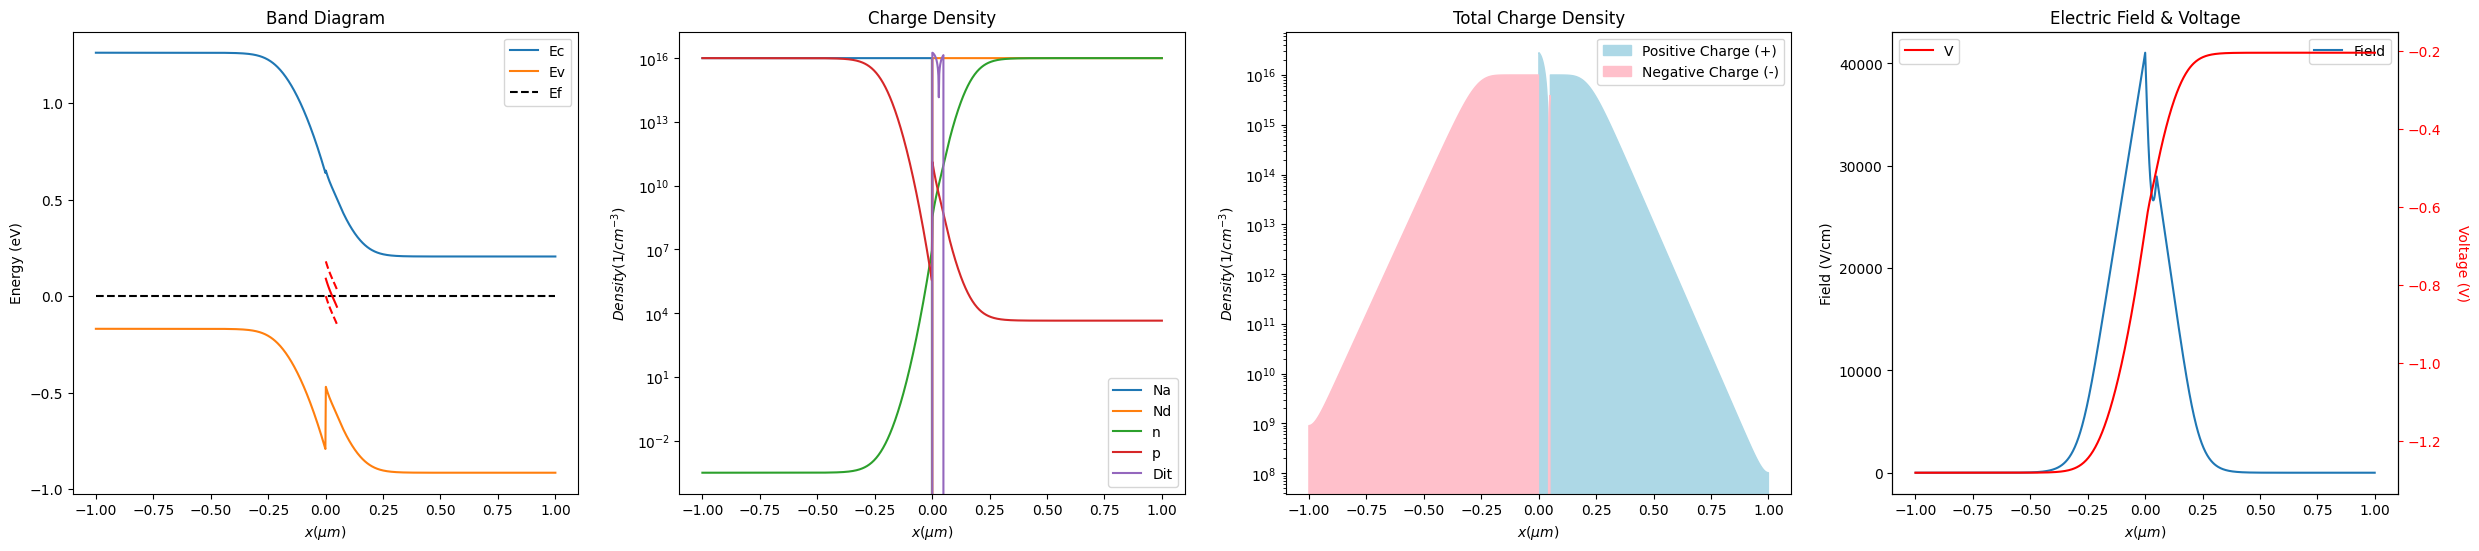

In [65]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

ax = solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);
ax[1].plot(x * 1e4, np.abs(cal_Dit(x, V)), label='Dit')
ax[1].legend()

mask = np.bitwise_and( x>0, x<0.05e-4)
E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
ax[0].plot( x[mask]*1e4, E_dit_mean, 'r')
ax[0].plot( x[mask]*1e4, E_dit_mean+3*E_dit_sigma, 'r--')
ax[0].plot( x[mask]*1e4, E_dit_mean-3*E_dit_sigma, 'r--')

# Si N + BC + Dipole? 

In [66]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(0, 1e-4, 1000) # cm
L = 0.05e-4
Na = np.zeros_like(x)
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[L,np.inf]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[0, np.inf],]) / e 

# dipole
mask1 = np.bitwise_and(x>=0, x<L/3)
mask2 = np.bitwise_and(x>=(1-1/3)*L, x<L)

N_dipole = 3e17
Na[mask2] = N_dipole
Nd[mask1] = N_dipole


materials = ['Si',]
x_range = np.array( [ [L, np.inf], ] )

In [67]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    Ec = cal_Ec_from_V(x, V)
    return cal_electron_density_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_p(x, V):
    Ev = cal_Ev_from_V(x, V)
    return cal_hole_density_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dn_dV(x, V):
    Ec = cal_Ec_from_V(x, V)
    return -cal_dn_dEc_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dp_dV(x, V):
    Ev = cal_Ev_from_V(x, V)
    return -cal_dp_dEv_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_q) * cal_dtotal_charge_density_dV(x, V)


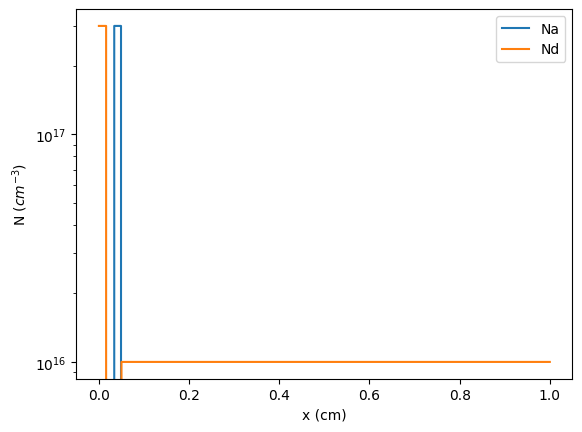

In [68]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [69]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000, tol=1e-10)

 21%|██        | 420/2000 [00:00<00:03, 444.78it/s]


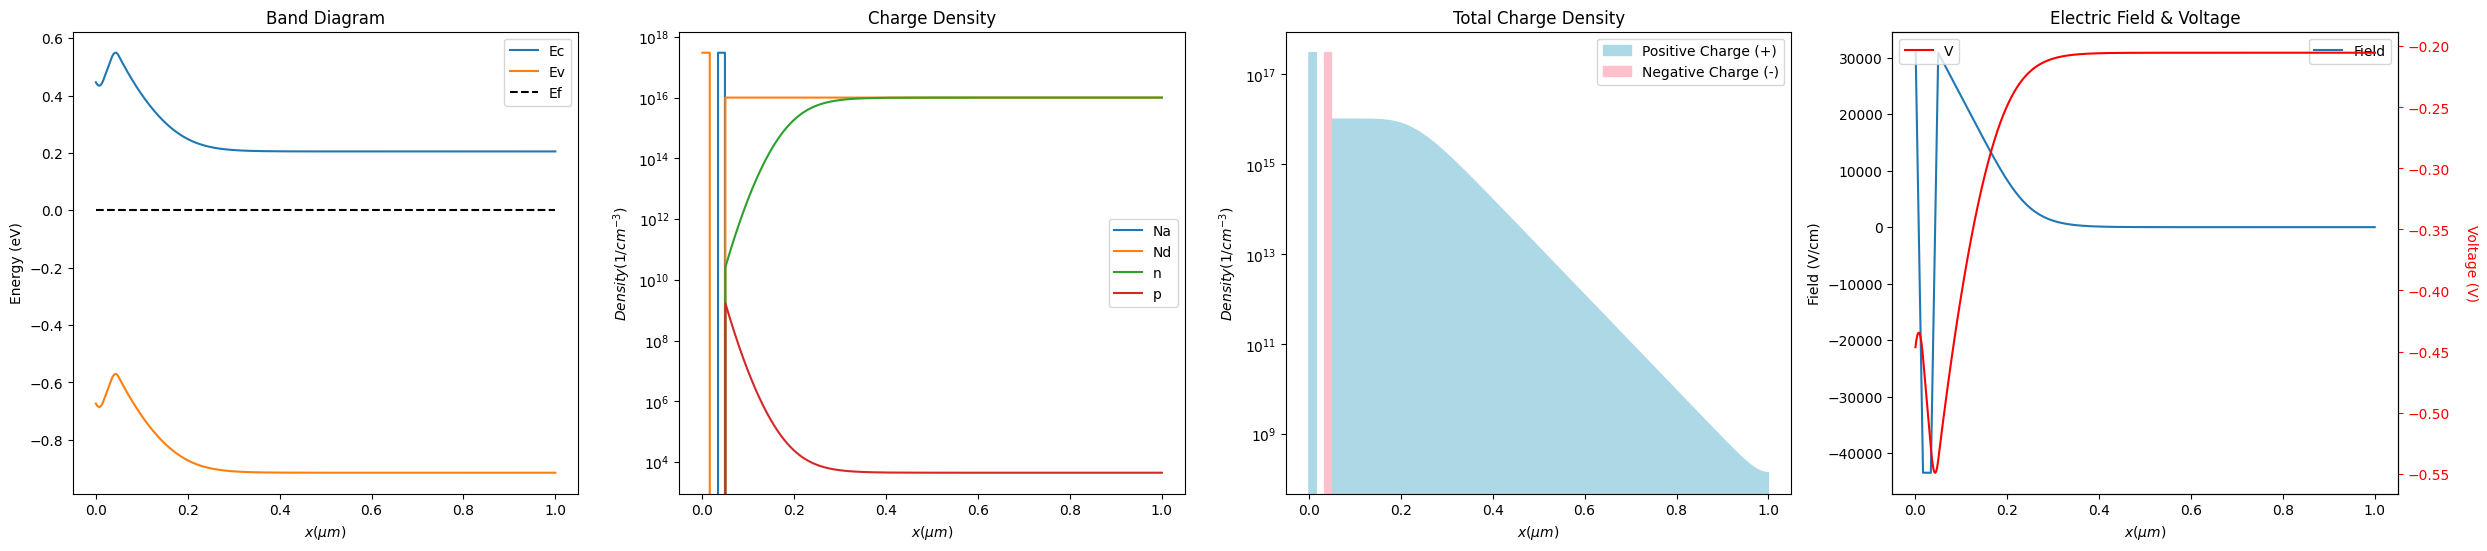

In [70]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);